# Importing BeautifulSoup

In [1]:
from bs4 import BeautifulSoup 
import requests
from requests import get
import pandas as pd
import os, sys

# Requesting info from IMDB 

In [2]:
#IMDB's top 250 movies

url = requests.get('https://www.imdb.com/chart/top/')
source = url.raise_for_status()

soup = BeautifulSoup(url.text,'html.parser')
    
movies = soup.find('tbody',class_='lister-list').find_all('tr')    

<h1> Headers for movie related info

<h2> 1. Name of Movie

In [3]:
NAME = []
for movie_name in movies:        
    name = movie_name.find('td',class_='titleColumn').a.text
    NAME.append(name)

An empty list for holding the names of the movies is created. A for loop that iterates over titles (names) of the movies and appends them over time into the empty list has also been developed. The parent tag is $tbody$ and the parent class is $lister-list$ and all the classes/tags that follow are the child classes/tags.

<h2> 2. Rank

In [4]:
RANKING = []
for movie_rank in movies:
    rank = movie_rank.find('td',class_='titleColumn').get_text(strip=True).split('.')[0]
    RANKING.append(rank)

1) The Rank of the movie in the HTML code was embedded in the heading like so:
        
            1. 
            The Shawshank Redemption
         (1994)

2) And we are interested in extracting the digit '1' i.e., the rank. Thus, first the text is stripped and all the new lines are removed and the output is now:
    
        1. The Shawshank Redemption(1994)

3) Finally, the split function separates all elements and the numbers before the (' . ') are indexed as 0, which is exactly what the expected output is...

<h2> 3. Year of release

In [5]:
YEAR_OF_RELEASE = []
for movie_year in movies:
    year = movie_year.find('td',class_='titleColumn').span.get_text(strip=True)[1:5]
    YEAR_OF_RELEASE.append(year)

An alternate way for extracting the Year is:

     year = movie_year.find('td',class_='titleColumn').span.text.strip('()')

<h2> 4. Ratings out of 10

In [6]:
RATING = []
for movie_rating in movies:
    rate = movie_rating.find('td',class_='ratingColumn imdbRating').strong.text
    RATING.append(rate)

<h1> Creating a dataset that will be used for analysis

In [7]:
IMDB = {
'Rank':RANKING,
'Movie_Name':NAME,
'Year_Of_Release':YEAR_OF_RELEASE,
'Rating_OutOf_10':RATING
}

In [8]:
IMDB_Movies = pd.DataFrame(IMDB)

## Saving the DF as a CSV file

In [9]:
IMDB_Movies.to_csv('IMDB_Top_250.csv')

In [30]:
IMDB_Top_250 = pd.read_csv('IMDB_Top_250.csv')

----

<h1> Exploratory Data Analysis

## Dimensions

In [31]:
IMDB_Top_250.shape

(250, 5)

In [35]:
IMDB_Top_250.drop(['Unnamed: 0'],inplace=True,axis=1)

<h2> Data types

In [36]:
IMDB_Top_250.dtypes

Rank                 int64
Movie_Name          object
Year_Of_Release      int64
Rating_OutOf_10    float64
dtype: object

In [37]:
# except the movie name, we can change the rest to 'int' data type

cols_to_int = ['Rank','Year_Of_Release']

for cti in cols_to_int:
    IMDB_Top_250[cti] = IMDB_Top_250[cti].astype('int64')

In [38]:
# Rating_OutOf_10 is intrinsically of type float... so let's convert it into its rightful data type

IMDB_Top_250['Rating_OutOf_10'] = IMDB_Top_250['Rating_OutOf_10'].astype('float64')

In [39]:
# checking the latest changes...
print(IMDB_Top_250.dtypes)

Rank                 int64
Movie_Name          object
Year_Of_Release      int64
Rating_OutOf_10    float64
dtype: object


## Top 10 movies with Release year and Ratings

In [40]:
IMDB_Top_250[['Movie_Name','Year_Of_Release','Rating_OutOf_10']].head(10)

,Movie_Name,Year_Of_Release,Rating_OutOf_10
0,The Shawshank Redemption,1994,9.2
1,The Godfather,1972,9.2
2,The Dark Knight,2008,9.0
3,The Godfather: Part II,1974,9.0
4,12 Angry Men,1957,9.0
5,Schindler's List,1993,8.9
6,The Lord of the Rings: The Return of the King,2003,8.9
7,Pulp Fiction,1994,8.9
8,The Lord of the Rings: The Fellowship of the Ring,2001,8.8
9,"Il buono, il brutto, il cattivo",1966,8.8


## Average rating for the 250 movies 

In [41]:
print(IMDB_Top_250['Rating_OutOf_10'].mean())

8.260799999999975


In [42]:
# The result of mean might come off as a bit skewed because of how easily it is affected by outliers,
# so finding Median is a better practice

print(IMDB_Top_250['Rating_OutOf_10'].median())

8.2


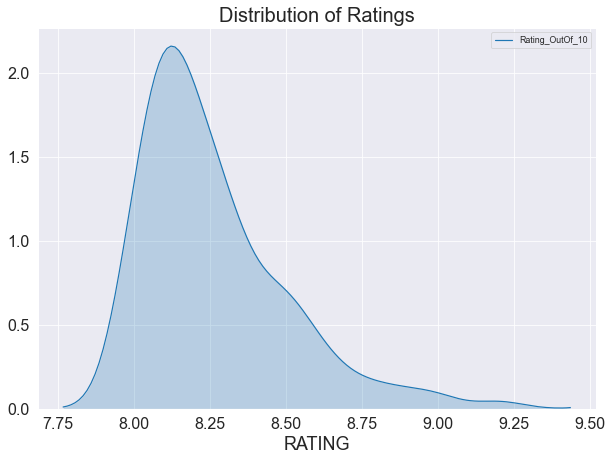

In [43]:
# lets visualise 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
sns.set_context('paper')
plt.figure(figsize=(10,7))
plt.xlabel('RATING',size=18)
plt.xticks(size=16)
plt.yticks(size=16)
plt.title('Distribution of Ratings',size=20)
sns.kdeplot(IMDB_Top_250['Rating_OutOf_10'],shade=True)

<p style='font-size:16px;'> Looks like most of the movie ratings fall in the bracket of 8 to 8.25 stars. The median value attests the fact.

## Unique Ratings' values

In [44]:
unique_ratings = IMDB_Top_250['Rating_OutOf_10'].unique()

print(f'{unique_ratings}\nCount: {len(unique_ratings)}')

[9.2 9.  8.9 8.8 8.7 8.6 8.5 8.4 8.3 8.2 8.1 8. ]
Count: 12


In [45]:
IMDB_Top_250['Rating_OutOf_10'].value_counts(ascending=False)

8.1    67
8.2    47
8.0    35
8.3    35
8.5    20
8.4    18
8.6    11
8.7     5
8.8     4
9.0     3
8.9     3
9.2     2
Name: Rating_OutOf_10, dtype: int64

<p style='font-size:16px;'> Most movies have been rated a 8.1 and only 2 have been rated with 9.2 stars 

In [46]:
IMDB_Top_250['Year_Of_Release']

0      1994
1      1972
2      2008
3      1974
4      1957
       ... 
245    1991
246    1982
247    2011
248    2016
249    1990
Name: Year_Of_Release, Length: 250, dtype: int64

In [47]:
unique_years = IMDB_Top_250['Year_Of_Release'].unique()

In [48]:
# How many unique years ?
unique_years.sort()
print(unique_years)
print('\nEarliest movie:',unique_years.min())
print('\nLatest movie:',unique_years.max())
print('\nSpan:',2022-1921,'years')

[1921 1924 1925 1926 1927 1928 1931 1934 1936 1939 1940 1941 1942 1944
 1946 1948 1949 1950 1952 1953 1954 1955 1957 1958 1959 1960 1961 1962
 1963 1964 1965 1966 1967 1968 1971 1972 1973 1974 1975 1976 1977 1978
 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
 2021 2022]

Earliest movie: 1921

Latest movie: 2022

Span: 101 years


<p style='font-size:16px;'> The range of our highest rated movies is from 1921 to 2022

In [49]:
# Let's see which ones are the oldest and the latest high rankers in our data...

IMDB_Top_250[(IMDB_Top_250['Year_Of_Release']==1921)]

,Rank,Movie_Name,Year_Of_Release,Rating_OutOf_10
128,129,The Kid,1921,8.2


In [50]:
IMDB_Top_250[(IMDB_Top_250['Year_Of_Release']==2022)]

,Rank,Movie_Name,Year_Of_Release,Rating_OutOf_10
121,122,The Batman,2022,8.2


## The 2 years that gave us the most highly rated movies

In [51]:
IMDB_Top_250['Year_Of_Release'].value_counts().nlargest(2)

1995    8
2004    7
Name: Year_Of_Release, dtype: int64

In [52]:
IMDB_Top_250[(IMDB_Top_250['Year_Of_Release']==1995)]

,Rank,Movie_Name,Year_Of_Release,Rating_OutOf_10
18,19,Se7en,1995,8.6
38,39,The Usual Suspects,1995,8.5
72,73,Braveheart,1995,8.3
73,74,Toy Story,1995,8.3
112,113,Heat,1995,8.2
135,136,Casino,1995,8.2
186,187,Before Sunrise,1995,8.1
243,244,La haine,1995,8.0


In [53]:
IMDB_Top_250[(IMDB_Top_250['Year_Of_Release']==2004)]

,Rank,Movie_Name,Year_Of_Release,Rating_OutOf_10
89,90,Eternal Sunshine of the Spotless Mind,2004,8.3
127,128,Der Untergang,2004,8.2
163,164,Hauru no ugoku shiro,2004,8.1
172,173,Million Dollar Baby,2004,8.1
207,208,Hotel Rwanda,2004,8.1
225,226,The Incredibles,2004,8.0
227,228,Before Sunset,2004,8.0


While 1995 and 2004 gave us the most highly rated movies, 1994 has given us without a doubt, the most iconic movies... So here is a group of honorable mentions...

In [54]:
IMDB_Top_250[(IMDB_Top_250['Year_Of_Release']==1994)]

,Rank,Movie_Name,Year_Of_Release,Rating_OutOf_10
0,1,The Shawshank Redemption,1994,9.2
7,8,Pulp Fiction,1994,8.9
10,11,Forrest Gump,1994,8.8
32,33,Léon,1994,8.5
35,36,The Lion King,1994,8.5
